In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn . preprocessing import PolynomialFeatures
# changing the string data to categorical data like changing Direction to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn . neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import math
from matplotlib import pyplot as plt

In [51]:
df = pd.read_json(r"dataset.json", orient="split")
df = df.drop(columns=['ANM', 'Non-ANM', 'Lead_hours'])
df = df.dropna()
#df = df.ffill().bfill()

df.replace({"N":math.radians(0), "NNE":math.radians(22.5), 
"NE":math.radians(45),"ENE":math.radians(67.5),"E":math.radians(90), 
"ESE":math.radians(111.5), "SE":math.radians(135), 
"SSE":math.radians(157.5),"S":math.radians(180),
"SSW":math.radians(202.5), "SW":math.radians(225),
"WSW":math.radians(247.5), "W":math.radians(270),
"WNW":math.radians(292.5),  "NW":math.radians(315), 
"NNW":math.radians(337.5)}, inplace=True)

# df = df.dropna()
X = df[["Speed", "Direction"]]
y = df["Total"]

X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Select numerical columns
categorical_cols = [
    cname for cname in X.columns if X[cname].nunique() < 20 and X[cname].dtype == "object"]
print("Categorial columns:"+str(categorical_cols))

# Select numerical columns
numerical_cols = [
    cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
print("numerical columns:"+str(numerical_cols))

# Keep selected columns only
my_cols = categorical_cols + numerical_cols

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

Categorial columns:[]
numerical columns:['Speed', 'Direction']


In [52]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
        ("Scaler", MinMaxScaler(), ["Speed", "Direction"])
    ],
    remainder = "passthrough")

In [53]:
model = RandomForestRegressor(n_estimators=100, random_state=15)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', model)
                                   ])
# the metrics to be looked at
metrics = [
          ("MAE", mean_absolute_error, []),
          ("MSE", mean_squared_error, [])
          ]

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['Speed', 'Direction']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  []),
                                                 ('Scaler', MinMaxScaler(),
                                                  ['Speed', 'Direction'])])),
                ('model', RandomForestRegressor(r

In [70]:
index_to_predict = 200
prediction_feed = X[["Speed","Direction"]]
prediction = my_pipeline.predict(prediction_feed)
actual = y[index_to_predict]

#my_pipeline.predict(X.iloc[0])
#truth = y.iloc[0]

#singleSample = X[["Speed","Direction"]]
#sample = (singleSample.iloc[0])
print(prediction_feed.iloc[index_to_predict])
print(prediction[index_to_predict])
print(actual)


Speed        7.152640
Direction    2.748894
Name: 2020-06-10 03:00:00, dtype: float64
9.981277981531202
10.406


In [66]:
WrongData = pd.read_json(r"dataset.json", orient="split")
WrongData = WrongData.drop(columns=['ANM', 'Non-ANM', 'Lead_hours'])
WrongData = WrongData.dropna()
WrongData['Speed']=WrongData['Speed'].apply(lambda x: x*0.514444) #we convert speed from m/s to knots

WrongData.replace({"N":math.radians(0), "NNE":math.radians(22.5), 
"NE":math.radians(45),"ENE":math.radians(67.5),"E":math.radians(90), 
"ESE":math.radians(111.5), "SE":math.radians(135), 
"SSE":math.radians(157.5),"S":math.radians(180),
"SSW":math.radians(202.5), "SW":math.radians(225),
"WSW":math.radians(247.5), "W":math.radians(270),
"WNW":math.radians(292.5),  "NW":math.radians(315), 
"NNW":math.radians(337.5)}, inplace=True)



In [73]:
index_to_predict = 200
prediction_feed = WrongData[["Speed","Direction"]]
prediction = my_pipeline.predict(prediction_feed)
actual = y[index_to_predict]
actual_feed = WrongData[["Total"]]

#my_pipeline.predict(X.iloc[0])
#truth = y.iloc[0]

#singleSample = X[["Speed","Direction"]]
#sample = (singleSample.iloc[0])
print(prediction_feed.iloc[index_to_predict])
print(prediction[index_to_predict])
print(actual)

Speed        3.679633
Direction    2.748894
Name: 2020-06-10 03:00:00, dtype: float64
3.501945587954529
10.406


MAE: 4.044150776710515


<ipython-input-98-dce8fc0ea3d3>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


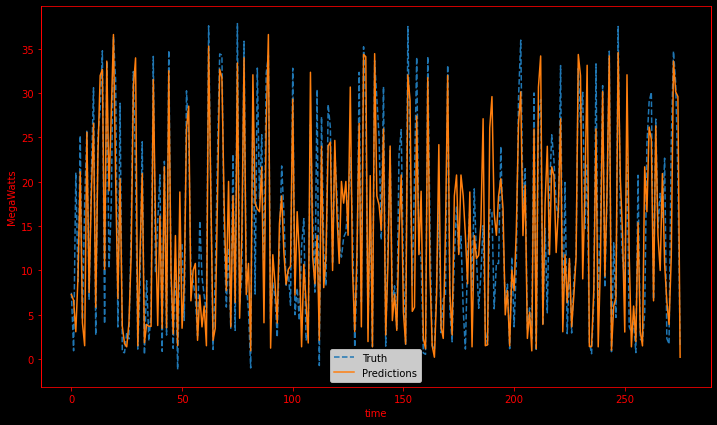

In [98]:
# Preprocessing of validation data, get predictions
#my_pipeline.fit(X_train, y_train)
Y_hat = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, Y_hat)
print('MAE:', score)

X_valid = X_valid.reset_index(drop=True)
y_valid = y_valid.reset_index(drop=True)

plt.figure(figsize=(12, 7),facecolor='black')
plt.plot(X_valid.index, y_valid, "--", label = "Truth")
plt.plot(X_valid.index, Y_hat, label = "Predictions")
ax = plt.axes()
# Setting the background color of the plot 
# using set_facecolor() method
ax.set_facecolor("black")
ax.spines['bottom'].set_color('red')
ax.spines['top'].set_color('red') 
ax.spines['right'].set_color('red')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('red')
ax.spines['left'].set_lw(1)
ax.xaxis.label.set_color('red')
ax.yaxis.label.set_color('red')
ax.tick_params(colors='red', which='both')
plt.xlabel("time")
plt.ylabel("MegaWatts")
plt.legend()
plt.show()



MAE: 9.735091250154666


<ipython-input-105-0f36c42c4630>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


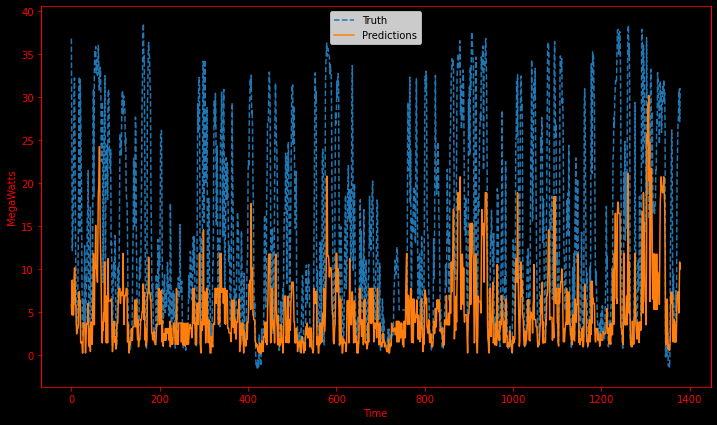

In [105]:
Y_hat = my_pipeline.predict(prediction_feed)

# Evaluate the model
score = mean_absolute_error(actual_feed, Y_hat)
print('MAE:', score)

prediction_feed = prediction_feed.reset_index(drop=True)
actual_feed = actual_feed.reset_index(drop=True)

plt.figure(figsize=(12, 7), facecolor='black')
plt.plot(prediction_feed.index, actual_feed, "--", label = "Truth")
plt.plot(prediction_feed.index, Y_hat, label = "Predictions")
ax = plt.axes()
# Setting the background color of the plot 
# using set_facecolor() method
ax.set_facecolor("black")
ax.spines['bottom'].set_color('red')
ax.spines['top'].set_color('red') 
ax.spines['right'].set_color('red')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('red')
ax.spines['left'].set_lw(1)
ax.xaxis.label.set_color('red')
ax.yaxis.label.set_color('red')
ax.tick_params(colors='red', which='both')
plt.xlabel("Time", color="red")
plt.ylabel("MegaWatts", color="red")
plt.legend()
plt.show()